# BoomBikes CaseStudy

## Problem Statement
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Step 1 - Read & Understand the Data

In [1]:
# Import Required Libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
# Read the data 
bikesData = pd.read_csv("boombikes-data.csv")
bikesData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikesData.shape

(730, 16)

In [4]:
bikesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- Observations
    - No Null Entries in the data for any of the columns
    - dteday is not a datetime object. To be converted.
    

In [5]:
bikesData.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


- Observations
    - temp, atemp, hum, windspeed attributes must be scaled as they have different scales.
    - yr, holiday, workingday - Categorical variables with 0 & 1 values.


## Step 2 - Data Cleansing

In [6]:
# Attributes instant and dteday do not add any value to our analysis as there are other attributes which can be used instead of dteday. 
# And instant is just a row number. Dropping these Columns.
# casual and registered are summed up in cnt variable, so dropping those as well.
bikesData1 = bikesData.drop(["instant", "dteday", "casual", "registered"], axis=1)
bikesData1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
# Drop duplicates if any
bikesData1.drop_duplicates(inplace=True)

In [8]:
# Rename columns to meaningful names
bikesData2 = bikesData1.rename({'cnt': 'total_rented_bikes_count', 'yr': 'year', 'mnth': 'month', 
                                'weathersit': 'weather_situation',
                                'temp': 'temperature', 'atemp': 'feels_like_temperature',
                                'hum': 'humidity'}, axis=1)
bikesData2.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather_situation', 'temperature', 'feels_like_temperature',
       'humidity', 'windspeed', 'total_rented_bikes_count'],
      dtype='object')

In [9]:
# Map meaningful Values for categorical variables based on Data Dictionary. 
bikesData2['season'] = bikesData2['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4: 'Winter'})
bikesData2['weekday'] = bikesData2['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})
bikesData2['month'] = bikesData2['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}) 
bikesData2['weather_situation'] = bikesData2['weather_situation'].map({1:'Clear', 2:'Cloudy', 3:'LightSnowRain', 4:'HeavyRainSnow'})
bikesData2.head()


,season,year,month,holiday,weekday,workingday,weather_situation,temperature,feels_like_temperature,humidity,windspeed,total_rented_bikes_count
0,Spring,0,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# Round up the Temperature to nearest value as we don't need them at that precision
bikesData2['temperature'] = bikesData2['temperature'].apply(lambda x: round(x))
bikesData2['feels_like_temperature'] = bikesData2['feels_like_temperature'].apply(lambda x: round(x))
bikesData2.head()

,season,year,month,holiday,weekday,workingday,weather_situation,temperature,feels_like_temperature,humidity,windspeed,total_rented_bikes_count
0,Spring,0,Jan,0,Sat,0,Cloudy,14,18,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Cloudy,15,18,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8,9,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8,11,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9,11,43.6957,12.522300,1600


## Step 3 - Data Analysis via Visualization 

### Box Plot to analyse categorical variables

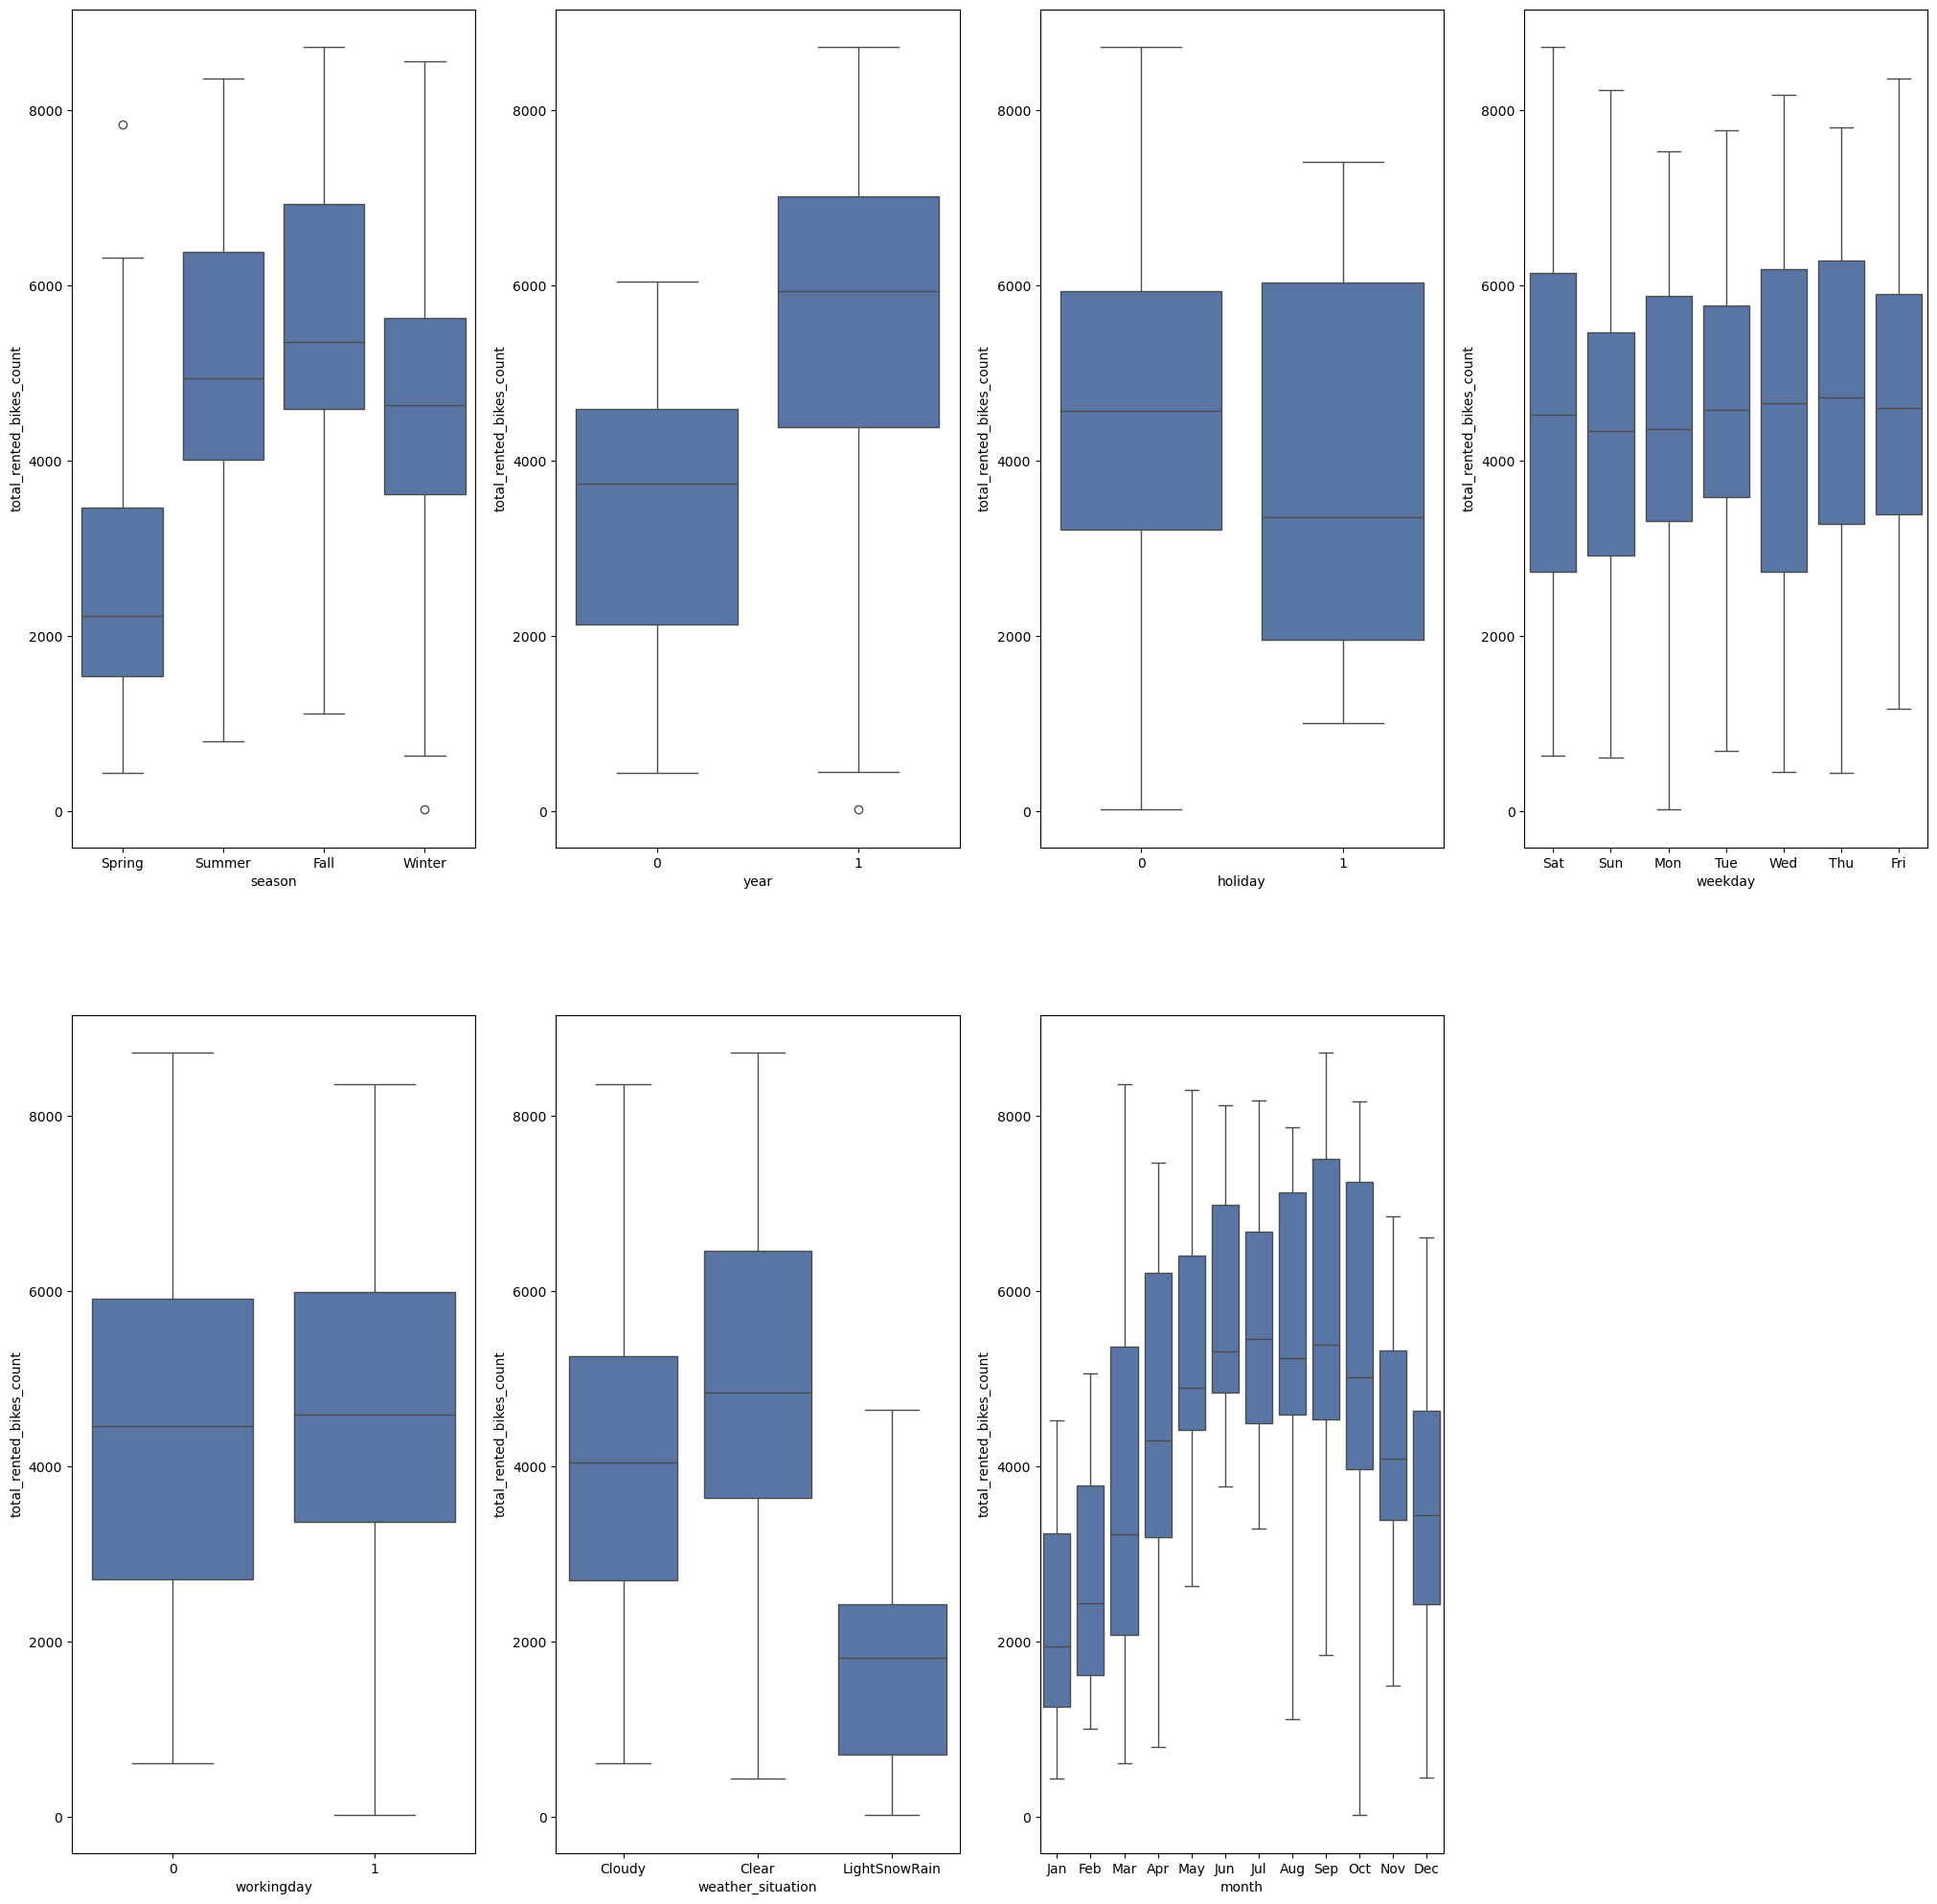

In [11]:
sns.set_palette('deep')

plt.figure(figsize=(25, 25))
plt.subplot(2, 4, 1)
sns.boxplot(data=bikesData2, x='season', y='total_rented_bikes_count')

plt.subplot(2, 4, 2)
sns.boxplot(data=bikesData2, x='year', y='total_rented_bikes_count')

plt.subplot(2, 4, 3)
sns.boxplot(data=bikesData2, x='holiday', y='total_rented_bikes_count')

plt.subplot(2, 4, 4)
sns.boxplot(data=bikesData2, x='weekday', y='total_rented_bikes_count')

plt.subplot(2, 4, 5)
sns.boxplot(data=bikesData2, x='workingday', y='total_rented_bikes_count')

plt.subplot(2, 4, 6)
sns.boxplot(data=bikesData2, x='weather_situation', y='total_rented_bikes_count')

plt.subplot(2, 4, 7)
sns.boxplot(data=bikesData2, x='month', y='total_rented_bikes_count')
plt.show()

### Bar Plots to Observe the Trends

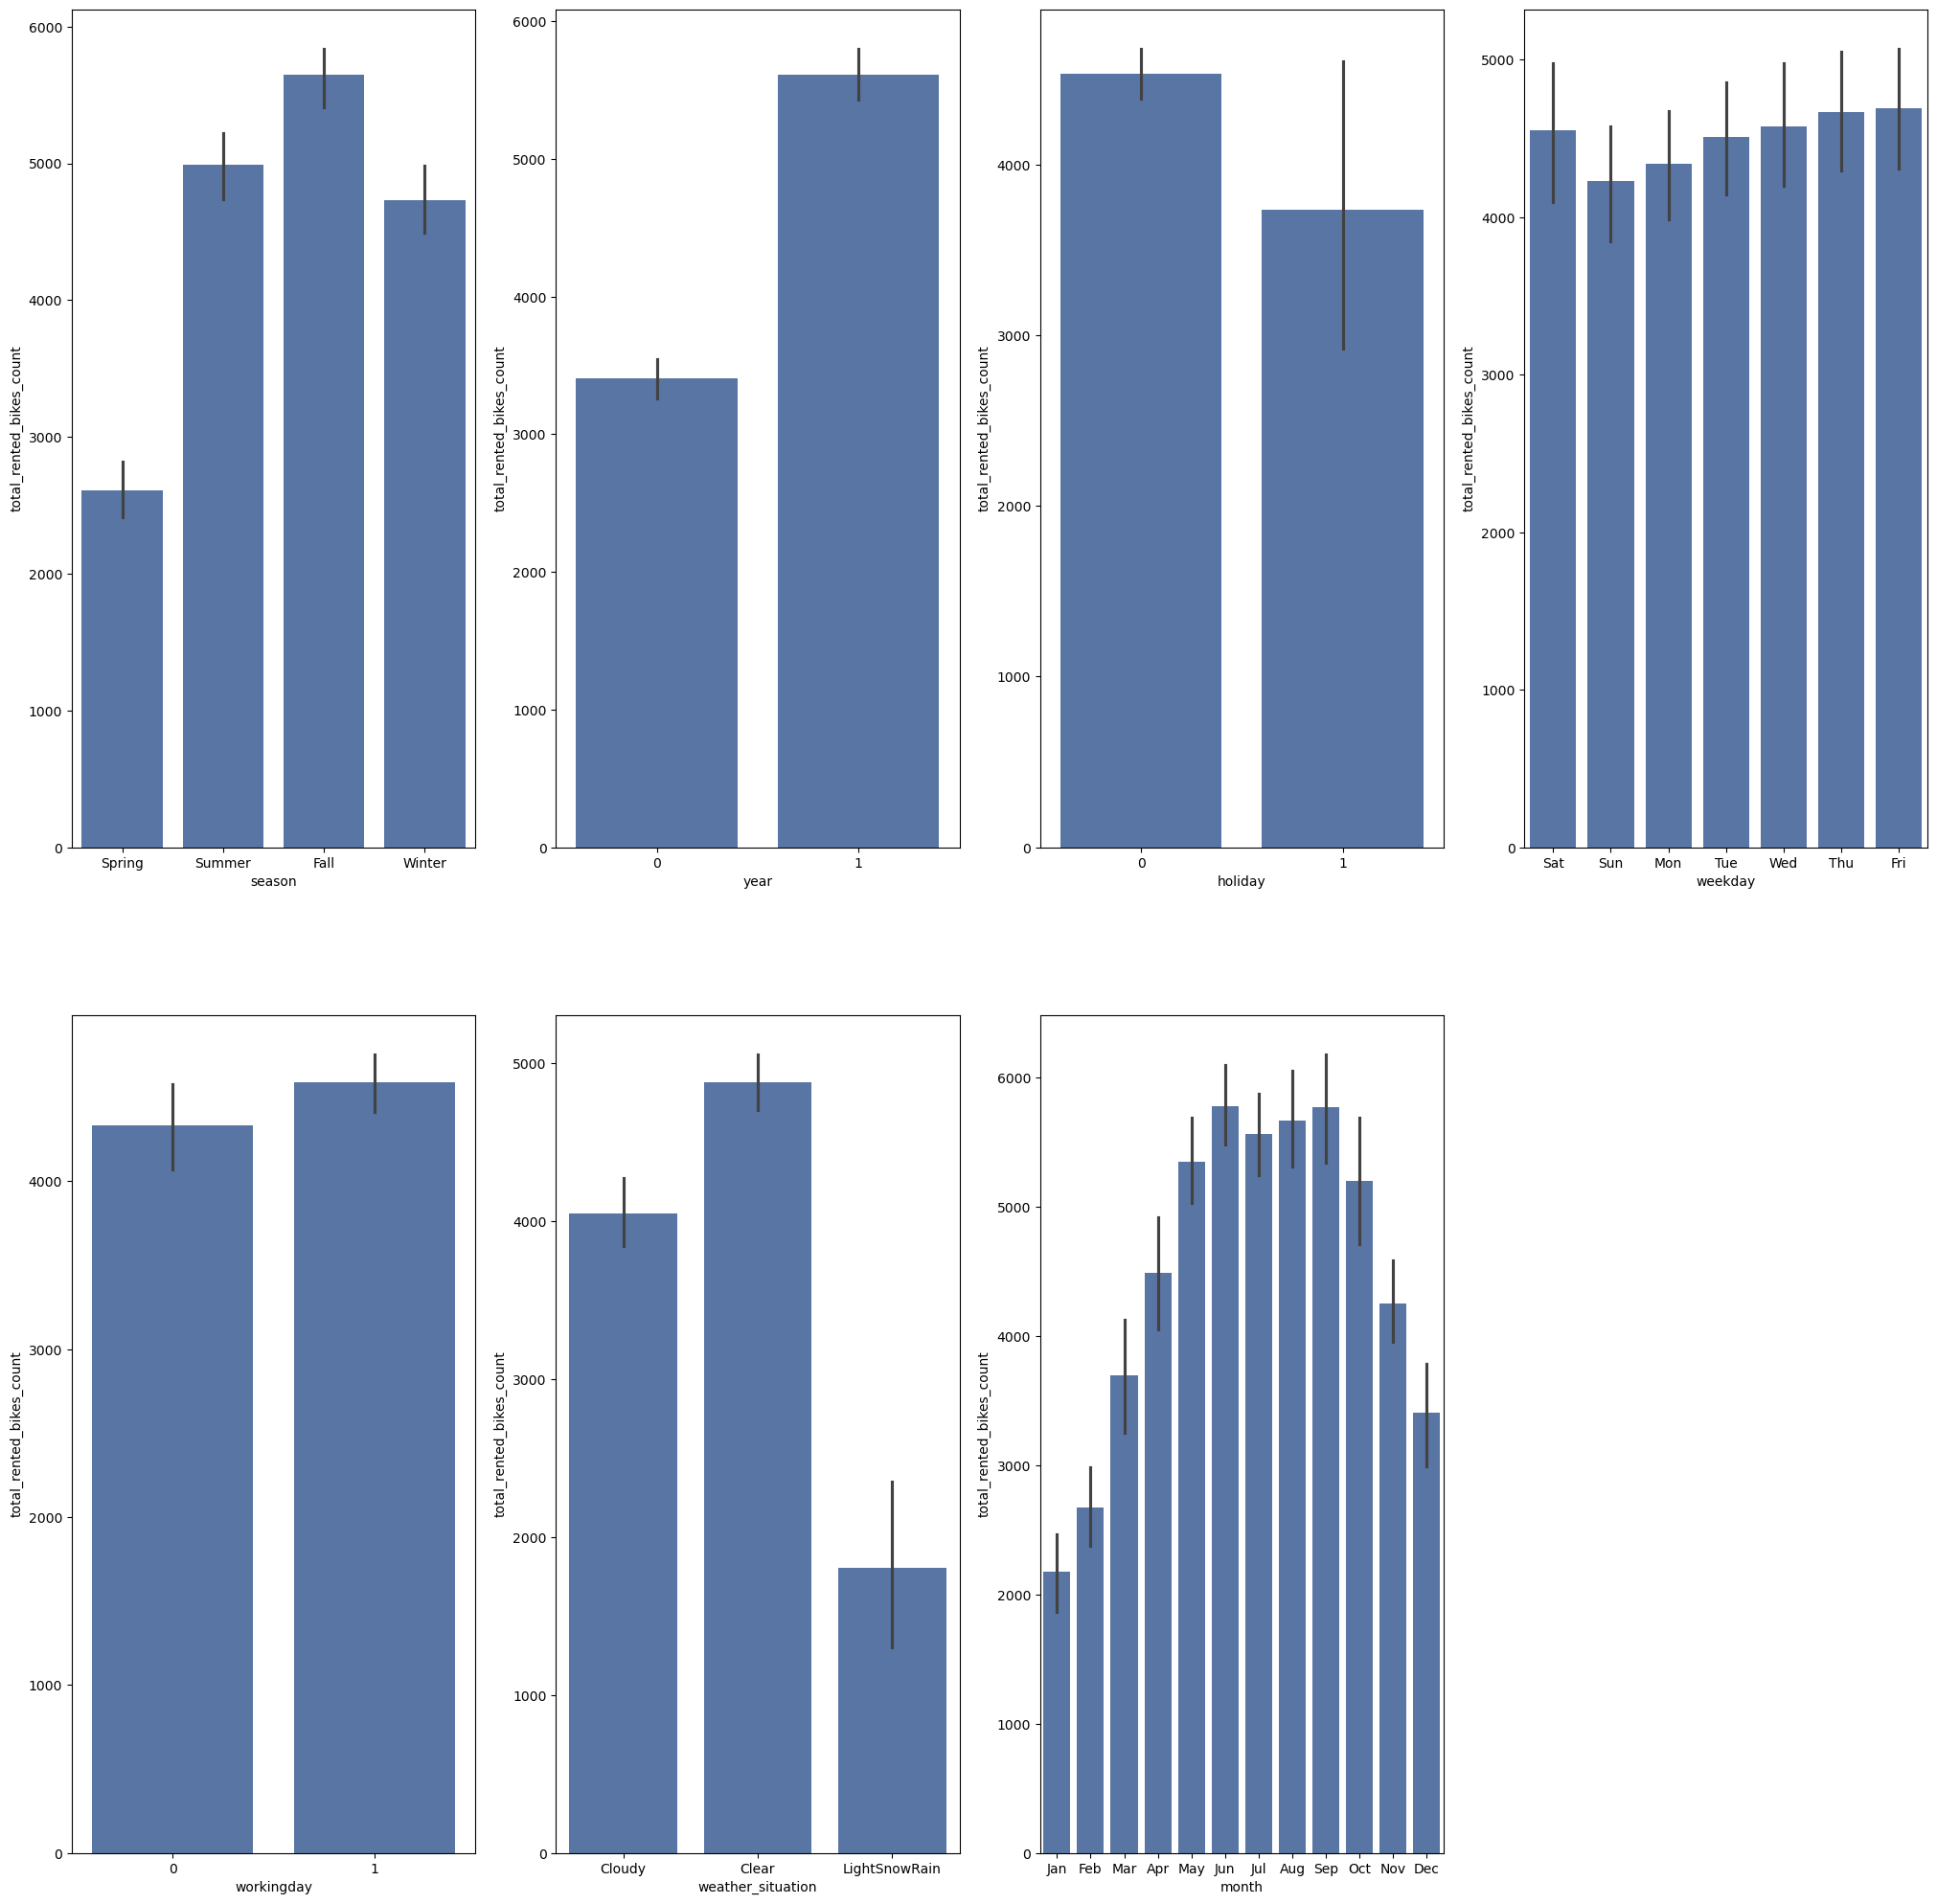

In [12]:
sns.set_palette('deep')

plt.figure(figsize=(25, 25))
plt.subplot(2, 4, 1)
sns.barplot(data=bikesData2, x='season', y='total_rented_bikes_count')

plt.subplot(2, 4, 2)
sns.barplot(data=bikesData2, x='year', y='total_rented_bikes_count')

plt.subplot(2, 4, 3)
sns.barplot(data=bikesData2, x='holiday', y='total_rented_bikes_count')

plt.subplot(2, 4, 4)
sns.barplot(data=bikesData2, x='weekday', y='total_rented_bikes_count')

plt.subplot(2, 4, 5)
sns.barplot(data=bikesData2, x='workingday', y='total_rented_bikes_count')

plt.subplot(2, 4, 6)
sns.barplot(data=bikesData2, x='weather_situation', y='total_rented_bikes_count')

plt.subplot(2, 4, 7)
sns.barplot(data=bikesData2, x='month', y='total_rented_bikes_count')
plt.show()

### Observations
- Total Rentals are more for Summer & Fall seasons
- There are more Rentals in 2019 compared to 2018
- More Rentals when the weather is Cloudy or Clear. However, it is very less when it Rains or Snows.
- Rentals increase as Spring and Summer approaches and decrease when Winter approaches.

### Pair Plots to understand the relationship and/or Trend of other variables with Total Rentals

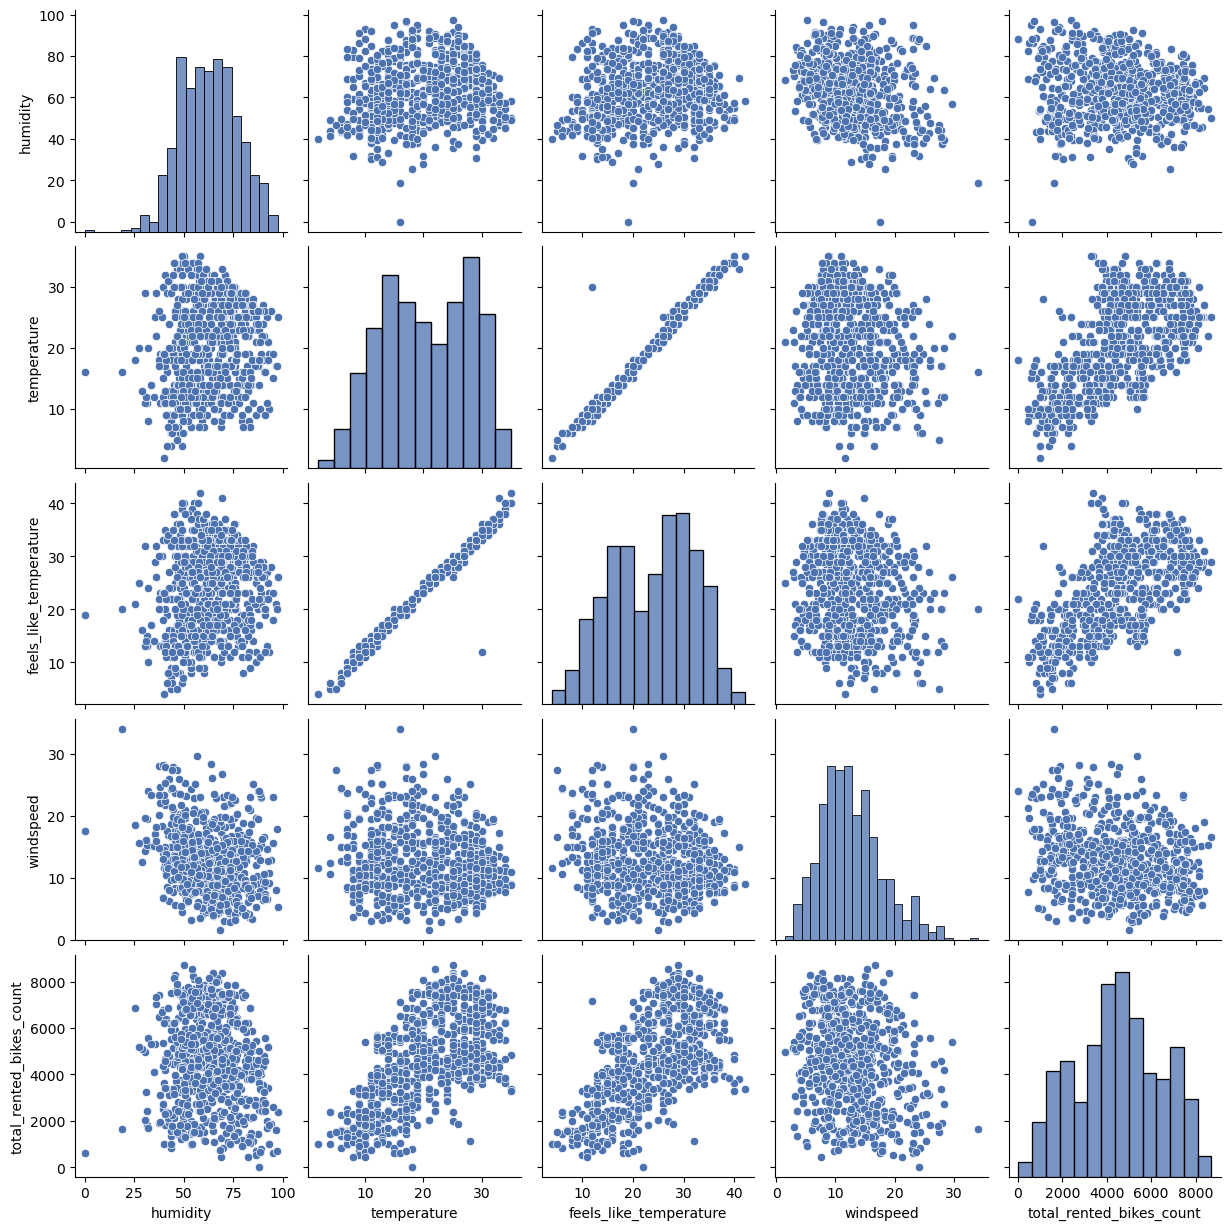

In [13]:
sns.pairplot(data=bikesData2, vars=['humidity', 'temperature', 'feels_like_temperature', 'windspeed', 'total_rented_bikes_count'])
plt.show()

### Heatmap To Understand Correlation between the variables

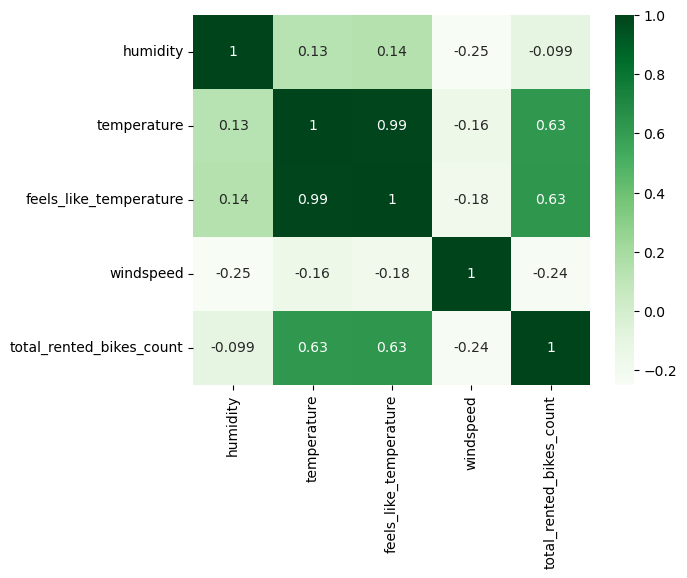

In [14]:
sns.heatmap(data=bikesData2[['humidity', 'temperature', 'feels_like_temperature', 'windspeed', 'total_rented_bikes_count']].corr(), annot=True, cmap='Greens')
plt.show()

### Observations
- As the Temperature and FeelsLikeTemperature increases, bike rentals increase - Showing Positive Linear Correlation
- As the windspeed increases, bike rentals decrease - Negative Linear Correlation
- If the humidity is in the range 25-to-70 bike rentals are more. However, as the humidity increases beyond that, the rentlals decrease. - Slightly Negative Correlation but not as much as windspeed

## Step 4 - Data Preparation

- All the values for Linear Regression model must be numbers. Hence, we need to convert all the String values to numerical values. 
- And scale the values if necessary.
- For n levels of categories available, we just need n-1 dummy variables, hence, we will be dropping the very first variable

In [15]:
bikesData2['month'].head()

0    Jan
1    Jan
2    Jan
3    Jan
4    Jan
Name: month, dtype: object

In [16]:
seasonValues = pd.get_dummies(bikesData2['season'], drop_first=True).astype('int')
seasonValues.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [17]:
monthValues = pd.get_dummies(bikesData2['month'], drop_first=True).astype('int')
monthValues.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [18]:
weekdayValues = pd.get_dummies(bikesData2['weekday'], drop_first=True).astype('int')
weekdayValues.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [19]:
weatherSituationValues = pd.get_dummies(bikesData2['weather_situation'], drop_first=True).astype('int')
weatherSituationValues.head()

,Cloudy,LightSnowRain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [20]:
# Concat the new values with the main Dataframe and drop the columns which are not needed
bikesDataLR1 = pd.concat([bikesData2, seasonValues, monthValues, weekdayValues, weatherSituationValues], axis=1)
bikesDataLR = bikesDataLR1.drop(['season', 'month', 'weekday', 'weather_situation'], axis=1)
bikesDataLR.head()

,year,holiday,workingday,temperature,feels_like_temperature,humidity,windspeed,total_rented_bikes_count,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,LightSnowRain
0,0,0,0,14,18,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,15,18,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8,9,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8,11,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9,11,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


- Check for non null values in the derived columns and ensure they are numeric data types

In [21]:
bikesDataLR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      730 non-null    int64  
 1   holiday                   730 non-null    int64  
 2   workingday                730 non-null    int64  
 3   temperature               730 non-null    int64  
 4   feels_like_temperature    730 non-null    int64  
 5   humidity                  730 non-null    float64
 6   windspeed                 730 non-null    float64
 7   total_rented_bikes_count  730 non-null    int64  
 8   Spring                    730 non-null    int32  
 9   Summer                    730 non-null    int32  
 10  Winter                    730 non-null    int32  
 11  Aug                       730 non-null    int32  
 12  Dec                       730 non-null    int32  
 13  Feb                       730 non-null    int32  
 14  Jan       

- All the columns have non-null values and all the columns are numeric data type.

## Step 5 - Split Data - Training & Test Data sets

In [22]:
bikesDataLR_Train, bikesDataLR_Test = train_test_split(bikesDataLR, train_size=0.7, random_state=150)
print('Entire Data Shape:', bikesDataLR.shape)
print('Train Data Shape:', bikesDataLR_Train.shape)
print('Test Data Shape:', bikesDataLR_Test.shape)

Entire Data Shape: (730, 30)
Train Data Shape: (510, 30)
Test Data Shape: (220, 30)


In [23]:
bikesDataLR_Train.head()

,year,holiday,workingday,temperature,feels_like_temperature,humidity,windspeed,total_rented_bikes_count,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,LightSnowRain
589,1,0,1,30,33,54.5417,9.126204,6883,0,0,...,0,0,1,0,0,0,0,0,0,0
60,0,0,1,14,16,44.9583,20.624811,2134,1,0,...,0,0,0,0,0,0,0,1,0,0
261,0,0,1,23,26,69.0000,10.166714,4539,0,0,...,0,1,1,0,0,0,0,0,1,0
608,1,0,0,31,35,63.8333,7.583529,6140,0,0,...,0,1,0,1,0,0,0,0,1,0
51,0,1,0,12,14,60.5000,20.625682,1107,1,0,...,0,0,1,0,0,0,0,0,1,0


- As we can see, there are numerical values which are in different scales, especially humidity, temperatures and windspeed. We need to scale them to ensure the model accuracy

In [24]:
scaler = MinMaxScaler()
numericalVars = ['temperature', 'feels_like_temperature', 'humidity', 'total_rented_bikes_count']
bikesDataLR_Train[numericalVars] = scaler.fit_transform(bikesDataLR_Train[numericalVars])
bikesDataLR_Train[numericalVars].head()

,temperature,feels_like_temperature,humidity,total_rented_bikes_count
589,0.838710,0.756757,0.566667,0.778945
60,0.322581,0.297297,0.467099,0.205602
261,0.612903,0.567568,0.716883,0.495956
608,0.870968,0.810811,0.663203,0.689243
51,0.258065,0.243243,0.628571,0.081613


In [25]:
bikesDataLR_Train.describe()

,year,holiday,workingday,temperature,feels_like_temperature,humidity,windspeed,total_rented_bikes_count,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,LightSnowRain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.492157,0.033333,0.690196,0.529285,0.508638,0.649399,12.580218,0.489698,0.256863,0.250980,...,0.090196,0.078431,0.150980,0.143137,0.133333,0.137255,0.149020,0.156863,0.350980,0.023529
std,0.500429,0.179682,0.462867,0.247292,0.223447,0.145051,5.165815,0.232704,0.437332,0.434003,...,0.286744,0.269113,0.358381,0.350557,0.340268,0.344454,0.356457,0.364028,0.477745,0.151726
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500244,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.322581,0.324324,0.545021,8.959307,0.335989,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.548387,0.540541,0.646584,12.020771,0.497102,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.741935,0.695946,0.751083,15.458508,0.652753,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,34.000021,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Observations
- Mean for all the columns are very close to 50th percentile
- All the Variables have 510 rows

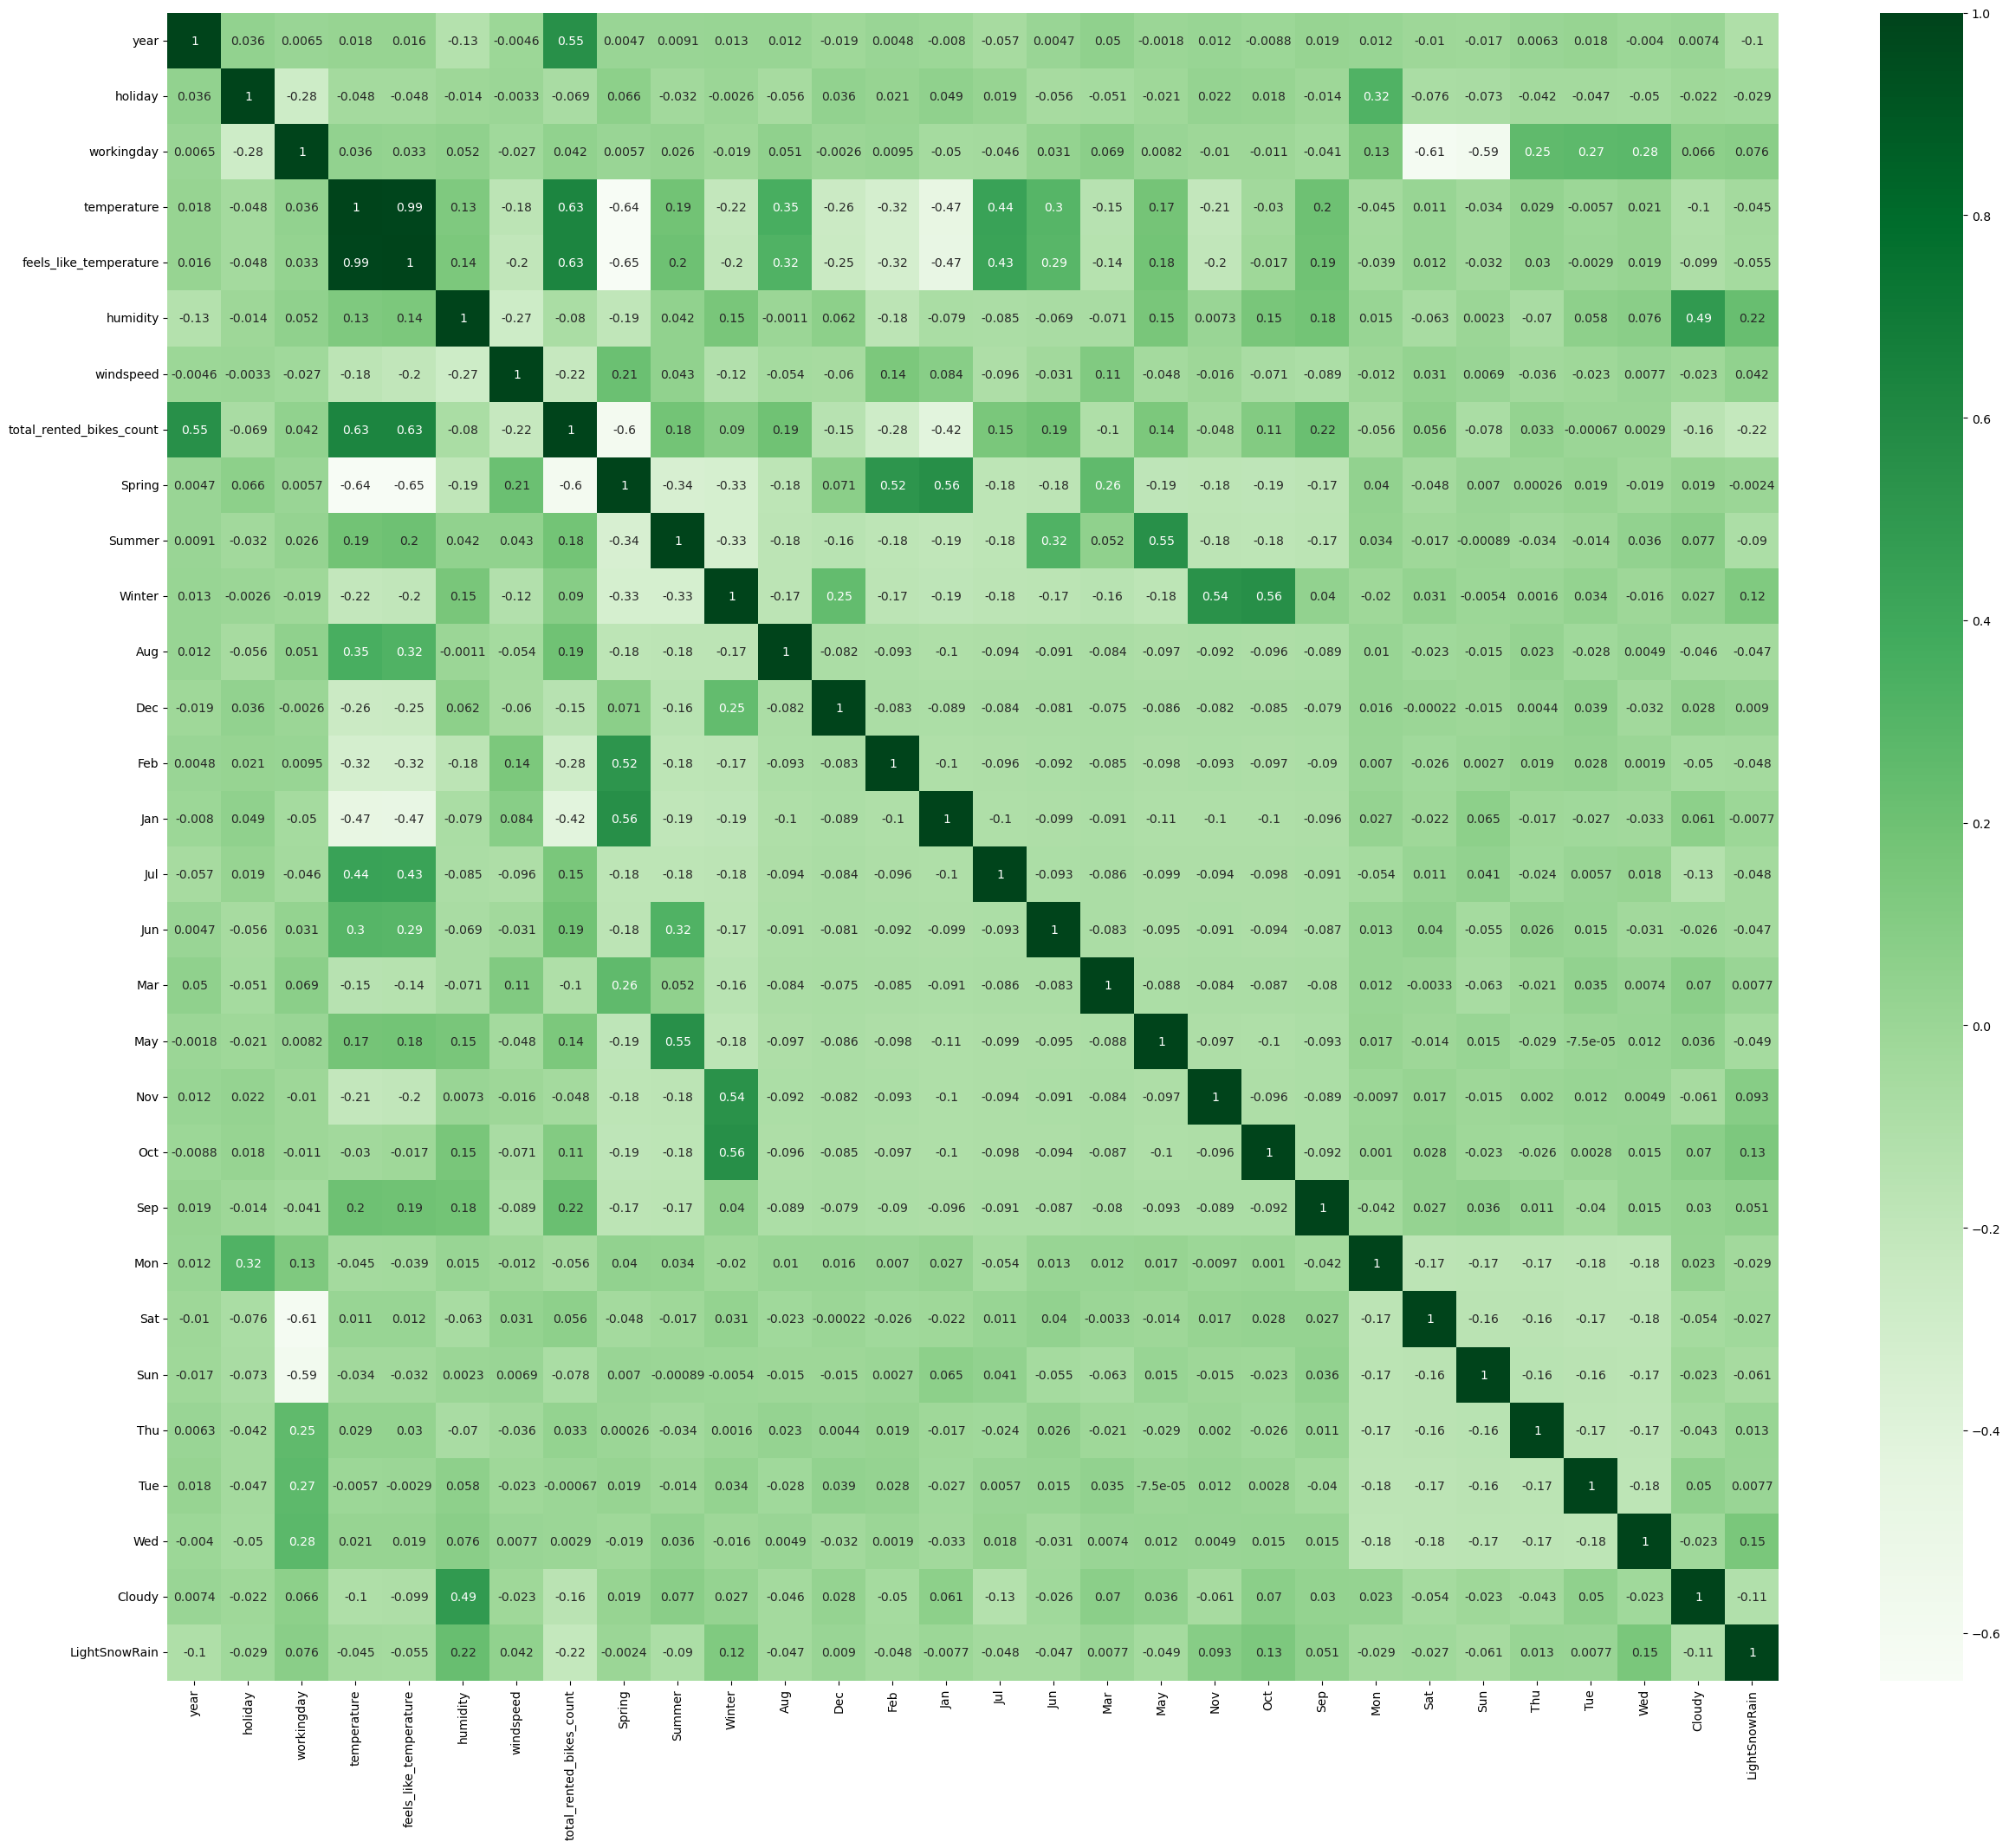

In [26]:
# Understand which Variables are highly correlated
plt.figure(figsize=(30, 25))
sns.heatmap(bikesDataLR_Train.corr(), annot=True, cmap='Greens')
plt.show()

### Observations
- Year seems to have high correlation with total_bikes_rented_count
- Temperature & Feels Like Temperature have high correlation with total_bikes_rented_count
- Jun, Jul, Aug & Sep months have good correlation
- Snow weather and winter months show negative correlation

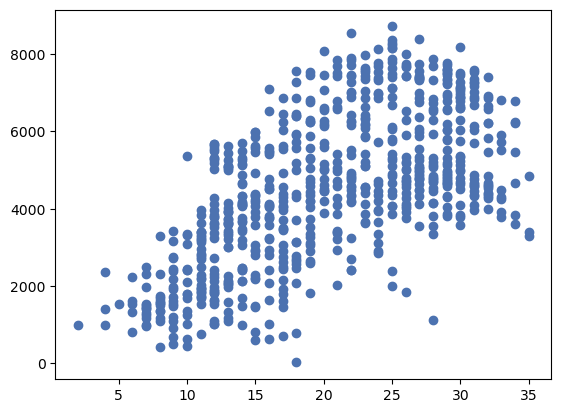

In [27]:
# Lets visualize the Correlation of some of the selected variables with Total Bikes Rented against all other variables
plt.scatter(bikesDataLR['temperature'], bikesDataLR['total_rented_bikes_count'])
plt.show()

### Observations
- Clearly there is a linear correlation with Temperature

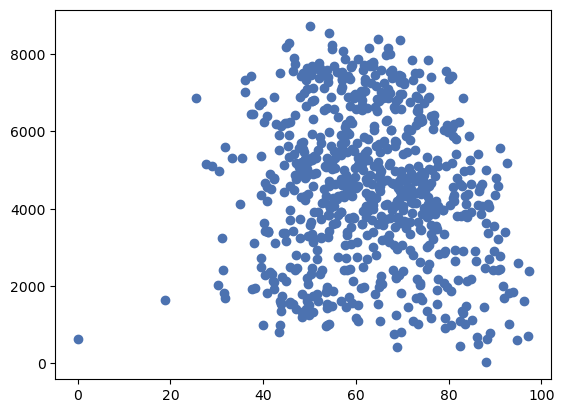

In [28]:
plt.scatter(bikesDataLR['humidity'], bikesDataLR['total_rented_bikes_count'])
plt.show()

### Observations
- There is correlation as the humidity increases. However, after it crosses 90 it seems to be going down

<!--  -->

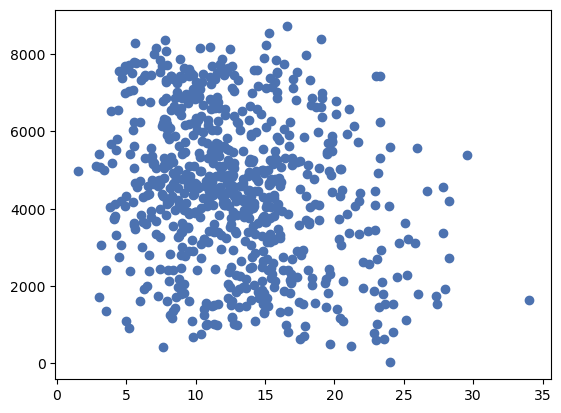

In [29]:
plt.scatter(bikesDataLR['windspeed'], bikesDataLR['total_rented_bikes_count'])
plt.show()

### Observations
- Whenever the windspeed is low, there are more bikes rented. Showing Negative correlation

### X & Y for building the model

In [30]:
y_train = bikesDataLR_Train.pop('total_rented_bikes_count')
X_train = bikesDataLR_Train

In [31]:
y_train.head()

589    0.778945
60     0.205602
261    0.495956
608    0.689243
51     0.081613
Name: total_rented_bikes_count, dtype: float64

In [32]:
X_train.head()

,year,holiday,workingday,temperature,feels_like_temperature,humidity,windspeed,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,LightSnowRain
589,1,0,1,0.838710,0.756757,0.566667,9.126204,0,0,0,...,0,0,1,0,0,0,0,0,0,0
60,0,0,1,0.322581,0.297297,0.467099,20.624811,1,0,0,...,0,0,0,0,0,0,0,1,0,0
261,0,0,1,0.612903,0.567568,0.716883,10.166714,0,0,0,...,0,1,1,0,0,0,0,0,1,0
608,1,0,0,0.870968,0.810811,0.663203,7.583529,0,0,0,...,0,1,0,1,0,0,0,0,1,0
51,0,1,0,0.258065,0.243243,0.628571,20.625682,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [33]:
print('X Train Shape:', X_train.shape)
print('y Train Shape:', y_train.shape)

X Train Shape: (510, 29)
y Train Shape: (510,)


## Step 6 - Building Model(s)

### Using RFE to identify the most relevant variables

In [34]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# We shall try selecting the Top 10 variables
rfe1 = RFE(estimator=lm, n_features_to_select=15) 
rfe = rfe1.fit(X_train, y_train)

In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', False, 4),
 ('workingday', True, 1),
 ('temperature', True, 1),
 ('feels_like_temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', False, 12),
 ('Spring', True, 1),
 ('Summer', False, 11),
 ('Winter', True, 1),
 ('Aug', False, 13),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Mon', False, 6),
 ('Sat', True, 1),
 ('Sun', False, 5),
 ('Thu', False, 7),
 ('Tue', False, 8),
 ('Wed', False, 9),
 ('Cloudy', True, 1),
 ('LightSnowRain', True, 1)]

In [36]:
### Selected Variables
X_train.columns[rfe.support_]

Index(['year', 'workingday', 'temperature', 'feels_like_temperature',
       'humidity', 'Spring', 'Winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep',
       'Sat', 'Cloudy', 'LightSnowRain'],
      dtype='object')

In [37]:
### Dropped Variables
X_train.columns[~rfe.support_]

Index(['holiday', 'windspeed', 'Summer', 'Aug', 'Feb', 'Jun', 'Mar', 'May',
       'Oct', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

### Model Building

In [38]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,year,workingday,temperature,feels_like_temperature,humidity,Spring,Winter,Dec,Jan,Jul,Nov,Sep,Sat,Cloudy,LightSnowRain
589,1,1,0.838710,0.756757,0.566667,0,0,0,0,0,0,0,0,0,0
60,0,1,0.322581,0.297297,0.467099,1,0,0,0,0,0,0,0,0,0
261,0,1,0.612903,0.567568,0.716883,0,0,0,0,0,0,1,0,1,0
608,1,0,0.870968,0.810811,0.663203,0,0,0,0,0,0,1,1,1,0
51,0,0,0.258065,0.243243,0.628571,1,0,0,0,0,0,0,0,1,0


In [39]:
# Add constant to the Train dataset
X_train_sm = sm.add_constant(X_train_rfe)
X_train_sm.head()

,const,year,workingday,temperature,feels_like_temperature,humidity,Spring,Winter,Dec,Jan,Jul,Nov,Sep,Sat,Cloudy,LightSnowRain
589,1.0,1,1,0.838710,0.756757,0.566667,0,0,0,0,0,0,0,0,0,0
60,1.0,0,1,0.322581,0.297297,0.467099,1,0,0,0,0,0,0,0,0,0
261,1.0,0,1,0.612903,0.567568,0.716883,0,0,0,0,0,0,1,0,1,0
608,1.0,1,0,0.870968,0.810811,0.663203,0,0,0,0,0,0,1,1,1,0
51,1.0,0,0,0.258065,0.243243,0.628571,1,0,0,0,0,0,0,0,1,0


In [40]:
lm_sm = sm.OLS(y_train, X_train_sm).fit()

### Linear Model Summary

In [41]:
lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     total_rented_bikes_count   R-squared:                       0.835
Model:                                  OLS   Adj. R-squared:                  0.830
Method:                       Least Squares   F-statistic:                     166.6
Date:                      Wed, 29 Jan 2025   Prob (F-statistic):          3.48e-182
Time:                              21:13:12   Log-Likelihood:                 479.86
No. Observations:                       510   AIC:                            -927.7
Df Residuals:                           494   BIC:                            -860.0
Df Model:                                15                                         
Covariance Type:                  nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2363      0.032      7.407      0.000       0.174       0.299
year                       0.2393      0.009     27.535      0.000       0.222       0.256
workingday                 0.0504      0.012      4.284      0.000       0.027       0.074
temperature                0.2284      0.117      1.945      0.052      -0.002       0.459
feels_like_temperature     0.1975      0.127      1.552      0.121      -0.052       0.448
humidity                  -0.1118      0.039     -2.895      0.004      -0.188      -0.036
Spring                    -0.1441      0.017     -8.374      0.000      -0.178      -0.110
Winter                     0.0880      0.015      5.934      0.000       0.059       0.117
Dec                       -0.0468      0.019     -2.420      0.016      -0.085      -0.009
Jan                       -0.0275      0.018     -1.503      0.133      -0.064       0.008
Jul                       -0.0570      0.018     -3.233      0.001      -0.092      -0.022
Nov                       -0.0840      0.020     -4.243      0.000      -0.123      -0.045
Sep                        0.0613      0.017      3.636      0.000       0.028       0.094
Sat                        0.0558      0.015      3.620      0.000       0.025       0.086
Cloudy                    -0.0596      0.011     -5.404      0.000      -0.081      -0.038
LightSnowRain             -0.2526      0.031     -8.273      0.000      -0.313      -0.193
==============================================================================
Omnibus:                       81.951   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.685
Skew:                          -0.814   Prob(JB):                     1.32e-45
Kurtosis:                       5.661   Cond. No.                         70.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observations
- R Sq value is very good. Around 80% of the variance is explained by the model.
- P-Value is very high for feels-like-temperature and Jan, drop these columns

In [42]:
X_train_sm1 = X_train_sm.drop(['feels_like_temperature', 'Jan'], axis=1)
X_train_sm1

,const,year,workingday,temperature,humidity,Spring,Winter,Dec,Jul,Nov,Sep,Sat,Cloudy,LightSnowRain
589,1.0,1,1,0.838710,0.566667,0,0,0,0,0,0,0,0,0
60,1.0,0,1,0.322581,0.467099,1,0,0,0,0,0,0,0,0
261,1.0,0,1,0.612903,0.716883,0,0,0,0,0,1,0,1,0
608,1.0,1,0,0.870968,0.663203,0,0,0,0,0,1,1,1,0
51,1.0,0,0,0.258065,0.628571,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,1.0,1,0,0.612903,0.499135,0,0,0,0,0,0,1,0,0
25,1.0,0,1,0.161290,0.896104,1,0,0,0,0,0,0,0,1
507,1.0,1,1,0.677419,0.804762,0,0,0,0,0,0,0,1,0
442,1.0,1,1,0.580645,0.757143,1,0,0,0,0,0,0,0,0


### Rebuild the Model after dropping the column

In [43]:
lm_sm1 = sm.OLS(y_train, X_train_sm1).fit()
lm_sm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     total_rented_bikes_count   R-squared:                       0.833
Model:                                  OLS   Adj. R-squared:                  0.829
Method:                       Least Squares   F-statistic:                     190.8
Date:                      Wed, 29 Jan 2025   Prob (F-statistic):          2.16e-183
Time:                              21:13:13   Log-Likelihood:                 477.29
No. Observations:                       510   AIC:                            -926.6
Df Residuals:                           496   BIC:                            -867.3
Df Model:                                13                                         
Covariance Type:                  nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2327      0.031      7.393      0.000       0.171       0.295
year              0.2391      0.009     27.431      0.000       0.222       0.256
workingday        0.0513      0.012      4.349      0.000       0.028       0.074
temperature       0.4176      0.033     12.756      0.000       0.353       0.482
humidity         -0.1093      0.038     -2.846      0.005      -0.185      -0.034
Spring           -0.1504      0.017     -8.933      0.000      -0.184      -0.117
Winter            0.0905      0.015      6.097      0.000       0.061       0.120
Dec              -0.0404      0.019     -2.140      0.033      -0.077      -0.003
Jul              -0.0598      0.018     -3.404      0.001      -0.094      -0.025
Nov              -0.0809      0.020     -4.096      0.000      -0.120      -0.042
Sep               0.0596      0.017      3.529      0.000       0.026       0.093
Sat               0.0565      0.015      3.659      0.000       0.026       0.087
Cloudy           -0.0605      0.011     -5.475      0.000      -0.082      -0.039
LightSnowRain    -0.2567      0.030     -8.432      0.000      -0.317      -0.197
==============================================================================
Omnibus:                       79.715   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.424
Skew:                          -0.795   Prob(JB):                     4.96e-44
Kurtosis:                       5.618   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observations
- R Sq value is still good. 
- P-Value is low for all the variables except for Dec when compared with other variables. However, it is still less than 0.05, we can retain the variable.
- Prob (F-statistic) is very low, which is a good sign

### VIF Analysis

In [44]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm1.values, i) for i in range(X_train_sm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,54.57
3,temperature,3.60
5,Spring,2.98
6,Winter,2.22
4,humidity,1.70
9,Nov,1.66
2,workingday,1.64
11,Sat,1.61
12,Cloudy,1.53
8,Jul,1.37


### Observations
- VIF is not that high for any of the variables, so we can retain all the variables

### Check for Multicolinearity

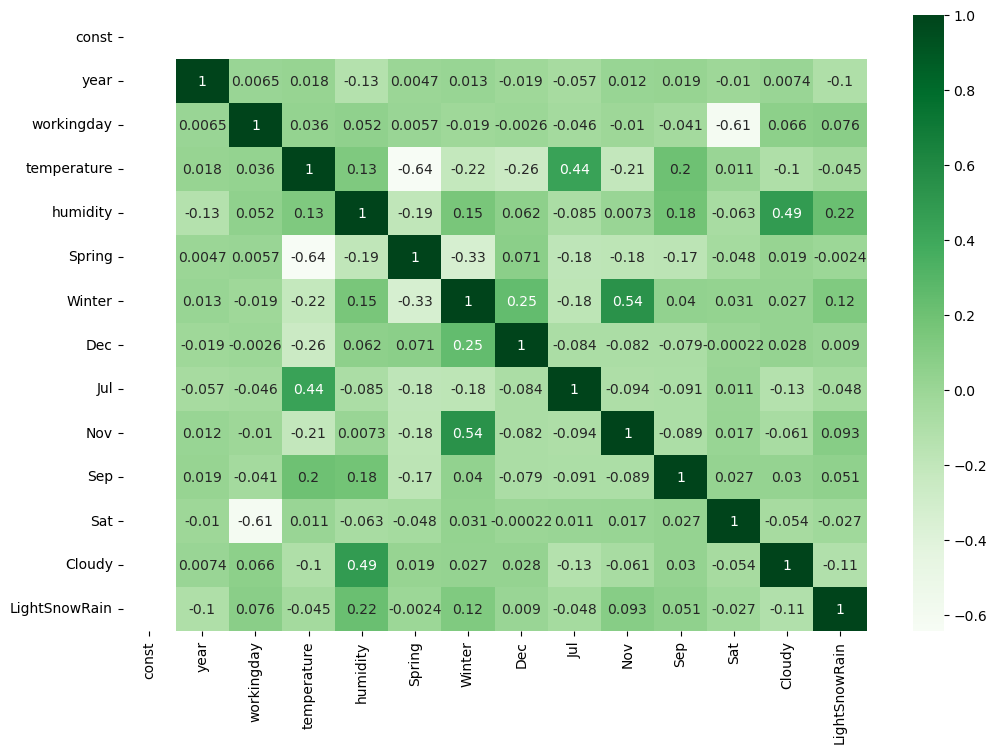

In [45]:
plt.figure(figsize=(12, 8))
sns.heatmap(X_train_sm1.corr(), annot=True, cmap='Greens')
plt.show()

### Observations
- None of correlation values are higher, so we can retain all the columns

## Step 7 - Residual Analysis

- Main Aim is to identify if the errors are normally distributed as per the assumptions of Linear Regression
- Check if there are any patterns in the Errors
- Errors must be independent

In [46]:
y_train_pred = lm_sm1.predict(X_train_sm1)

In [47]:
errors = (y_train - y_train_pred)

### Plot the distribution plot to understand the distribution of errors  

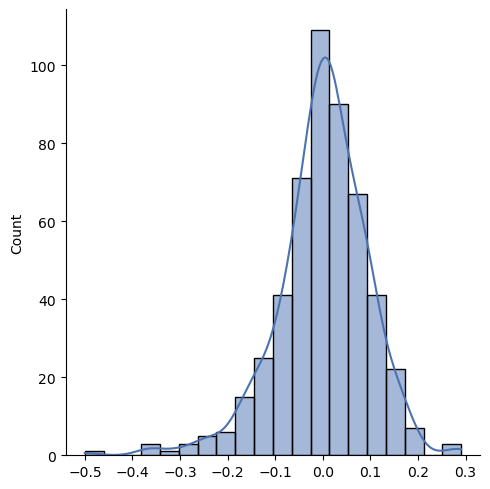

In [48]:
sns.displot(errors, bins=20, kde=True)
plt.show()

### Observations
- Error Mean is centered at 0 and adhers to the assumptions made for Linear Regression.

### Check if there are any Patterns in Errors, there shouldn't be any

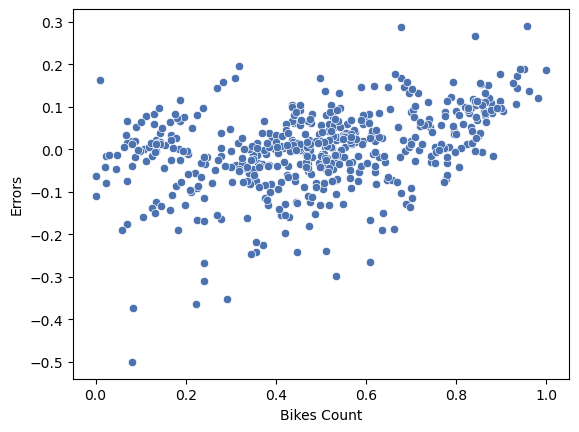

In [49]:
sns.scatterplot(x=y_train, y=errors)
plt.xlabel('Bikes Count')
plt.ylabel('Errors')
plt.show()

### Observations
- Errors are scattered around Zero and there are no specific patterns in them.

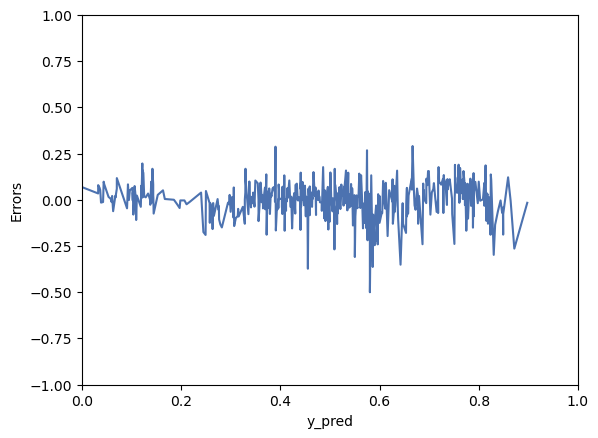

In [50]:
# Independence of Errors
sns.lineplot(x=y_train_pred,y=errors)
plt.xlabel('y_pred')
plt.ylabel('Errors')
plt.ylim(-1,1)
plt.xlim(0,1)
plt.show()

Observations
- Errors are 

## Step 8 - Predictions

### Scale Numerical values

In [51]:
numericVars = ['temperature', 'feels_like_temperature', 'humidity', 'total_rented_bikes_count']
#  The numerical values must be just transform to scale. They should not be fit for the data. This will helps us evaluate the accuracy of the model.
bikesDataLR_Test[numericVars] = scaler.transform(bikesDataLR_Test[numericVars])

In [52]:
y_test = bikesDataLR_Test.pop('total_rented_bikes_count')
X_test = bikesDataLR_Test

In [53]:
X_test.head()

,year,holiday,workingday,temperature,feels_like_temperature,humidity,windspeed,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,LightSnowRain
82,0,0,1,0.258065,0.243243,0.837229,16.333729,0,1,0,...,0,0,0,0,0,1,0,0,1,0
272,0,0,1,0.612903,0.594595,0.672727,13.833825,0,0,1,...,0,1,0,0,0,0,0,0,0,0
0,0,0,0,0.322581,0.351351,0.837229,10.749882,1,0,0,...,0,0,0,1,0,0,0,0,1,0
648,1,0,1,0.451613,0.459459,0.481385,12.166932,0,0,1,...,1,0,0,0,0,1,0,0,0,0
437,1,0,1,0.612903,0.594595,0.526839,7.709154,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [54]:
# Drop all the columns which were dropped from the Training set based on RFE
droppedColumns = ['holiday', 'windspeed', 'Summer', 'Aug', 'Feb', 'Jun', 'Mar', 'May',
       'Oct', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed']
X_test.drop(droppedColumns, axis=1, inplace=True)
X_test.head()

,year,workingday,temperature,feels_like_temperature,humidity,Spring,Winter,Dec,Jan,Jul,Nov,Sep,Sat,Cloudy,LightSnowRain
82,0,1,0.258065,0.243243,0.837229,0,0,0,0,0,0,0,0,1,0
272,0,1,0.612903,0.594595,0.672727,0,1,0,0,0,0,1,0,0,0
0,0,0,0.322581,0.351351,0.837229,1,0,0,1,0,0,0,1,1,0
648,1,1,0.451613,0.459459,0.481385,0,1,0,0,0,0,0,0,0,0
437,1,1,0.612903,0.594595,0.526839,1,0,0,0,0,0,0,0,0,0


In [55]:
# We also dropped some columns after analysing p-value, we can drop those too.
droppedColumnsSet2 = ['feels_like_temperature', 'Jan']
X_test.drop(droppedColumnsSet2, axis=1, inplace=True)
X_test.head()

,year,workingday,temperature,humidity,Spring,Winter,Dec,Jul,Nov,Sep,Sat,Cloudy,LightSnowRain
82,0,1,0.258065,0.837229,0,0,0,0,0,0,0,1,0
272,0,1,0.612903,0.672727,0,1,0,0,0,1,0,0,0
0,0,0,0.322581,0.837229,1,0,0,0,0,0,1,1,0
648,1,1,0.451613,0.481385,0,1,0,0,0,0,0,0,0
437,1,1,0.612903,0.526839,1,0,0,0,0,0,0,0,0


In [56]:
# Add Constant to the test dataset
X_test_sm = sm.add_constant(X_test)

In [57]:
print('X Train Shape:', X_train_sm1.shape)
print('X Test Shape:', X_test_sm.shape)

X Train Shape: (510, 14)
X Test Shape: (220, 14)


In [58]:
# Predict the y values for Test Data
y_test_pred = lm_sm1.predict(X_test_sm)

## Step 9 - Model Evaluation

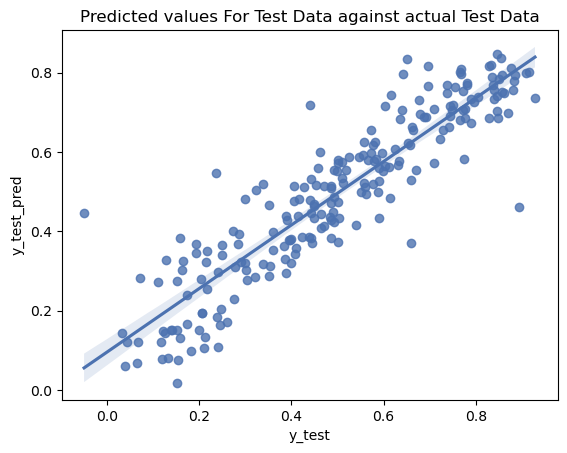

In [59]:
# Plot the model for test dataset against the predicted values
sns.regplot(x=y_test, y=y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('Predicted values For Test Data against actual Test Data')
plt.show()

### Observations
- The Predicted line is very close to the actual values, which is a good sign.

In [60]:
# Calculate r2-Score
r2Score = r2_score(y_true=y_test, y_pred=y_test_pred)
print('R2 Score:', r2Score)

R2 Score: 0.8220974578235901


### Observations
- R2 Score is high, good sign of the predicted model

In [61]:
# Coefficient Values
lm_sm1.params.sort_values(ascending=True)

LightSnowRain   -0.256693
Spring          -0.150424
humidity        -0.109258
Nov             -0.080866
Cloudy          -0.060485
Jul             -0.059844
Dec             -0.040381
workingday       0.051266
Sat              0.056511
Sep              0.059561
Winter           0.090467
const            0.232746
year             0.239096
temperature      0.417632
dtype: float64

### Observations
- Intercept - 0.23
- Highest Positive Correlation - Temperature & Year
- Highest Negative Correlation - LightSnow & Spring

## Conclusion
- To answer two important business questions
- Which variables are significant in predicting the demand for shared bikes?
    - Temperature, Spring & Lightsnow 
- How well those variables describe the bike demands?
    - Bike Demands increase by 0.41 times the Temperature (Positive)
    - Bike Demands decrease by 0.25 times during Lightsnow (Negative)
    - Bike Demands decrease by 0.15 times during Spring (Negative)